In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving chronickidneydisease.csv to chronickidneydisease.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving data_description.txt to data_description.txt


In [5]:
df=pd.read_csv("chronickidneydisease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
columns = pd.read_csv("data_description.txt",sep="-")
columns=columns.reset_index()
columns.columns=["cols","Full_names"]
columns.head()

,cols,Full_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin


In [7]:
df.columns = columns["Full_names"].values
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [9]:
def convert_dtypes(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')

In [10]:
features =['packed cell volume','white blood cell count','red blood cell count']
for feature in features:
    convert_dtypes(df,feature)

In [11]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

# DATA CLEANING

In [12]:
df.drop('id',axis=1,inplace=True)
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [13]:
def extract_cat_num(df):
    cat_col=[]
    num_col=[]
    for col in df.columns:
        if df[col].dtype=='object':
            cat_col.append(col)
        elif df[col].dtype!='object':
            num_col.append(col)
    return cat_col, num_col

In [14]:
cat_col,num_col=extract_cat_num(df)

In [15]:
for col in cat_col:
    print(' {} has {} numbers of values i.e. {}'.format(col, df[col].nunique(),df[col].unique()))

 red blood cells has 2 numbers of values i.e. [nan 'normal' 'abnormal']
  pus cell has 2 numbers of values i.e. ['normal' 'abnormal' nan]
 pus cell clumps has 2 numbers of values i.e. ['notpresent' 'present' nan]
 bacteria has 2 numbers of values i.e. ['notpresent' 'present' nan]
 ypertension has 2 numbers of values i.e. ['yes' 'no' nan]
 diabetes mellitus has 5 numbers of values i.e. ['yes' 'no' ' yes' '\tno' '\tyes' nan]
 coronary artery disease has 3 numbers of values i.e. ['no' 'yes' '\tno' nan]
 appetite has 2 numbers of values i.e. ['good' 'poor' nan]
 pedal edema has 2 numbers of values i.e. ['no' 'yes' nan]
 anemia has 2 numbers of values i.e. ['no' 'yes' nan]
 class has 3 numbers of values i.e. ['ckd' 'ckd\t' 'notckd']


In [16]:
df["diabetes mellitus"]= df['diabetes mellitus'].replace(to_replace ={'\tno':'no','\tyes':'yes'})
df["coronary artery disease"]= df['coronary artery disease'].replace(to_replace ={'\tno':'no','\tyes':'yes'})
df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd'})
for col in cat_col:
    print(' {} has {} numbers of values i.e. {}'.format(col, df[col].nunique(),df[col].unique()))

 red blood cells has 2 numbers of values i.e. [nan 'normal' 'abnormal']
  pus cell has 2 numbers of values i.e. ['normal' 'abnormal' nan]
 pus cell clumps has 2 numbers of values i.e. ['notpresent' 'present' nan]
 bacteria has 2 numbers of values i.e. ['notpresent' 'present' nan]
 ypertension has 2 numbers of values i.e. ['yes' 'no' nan]
 diabetes mellitus has 3 numbers of values i.e. ['yes' 'no' ' yes' nan]
 coronary artery disease has 2 numbers of values i.e. ['no' 'yes' nan]
 appetite has 2 numbers of values i.e. ['good' 'poor' nan]
 pedal edema has 2 numbers of values i.e. ['no' 'yes' nan]
 anemia has 2 numbers of values i.e. ['no' 'yes' nan]
 class has 2 numbers of values i.e. ['ckd' 'notckd']


In [17]:
df.isna().sum().sort_values(ascending =False)


red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [18]:
def random_value_imputation(df,feature):
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum())
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample
    print("The missing values",feature," are ", df[feature].isnull().sum())

In [19]:
df[num_col].isnull().sum()
for f in num_col:
    random_value_imputation(df,f)

The missing values age  are  0
The missing values blood pressure  are  0
The missing values specific gravity  are  0
The missing values albumin  are  0
The missing values sugar  are  0
The missing values blood glucose random  are  0
The missing values blood urea  are  0
The missing values serum creatinine  are  0
The missing values sodium  are  0
The missing values potassium  are  0
The missing values haemoglobin  are  0
The missing values packed cell volume  are  0
The missing values white blood cell count  are  0
The missing values red blood cell count  are  0


In [20]:
df[cat_col].isnull().sum()
for f in cat_col:
    random_value_imputation(df,f)

The missing values red blood cells  are  0
The missing values  pus cell  are  0
The missing values pus cell clumps  are  0
The missing values bacteria  are  0
The missing values ypertension  are  0
The missing values diabetes mellitus  are  0
The missing values coronary artery disease  are  0
The missing values appetite  are  0
The missing values pedal edema  are  0
The missing values anemia  are  0
The missing values class  are  0


In [21]:
print(df)

      age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0    48.0            80.0             1.020      1.0    0.0        abnormal   
1     7.0            50.0             1.020      4.0    0.0          normal   
2    62.0            80.0             1.010      2.0    3.0          normal   
3    48.0            70.0             1.005      4.0    0.0          normal   
4    51.0            80.0             1.010      2.0    0.0          normal   
..    ...             ...               ...      ...    ...             ...   
395  55.0            80.0             1.020      0.0    0.0          normal   
396  42.0            70.0             1.025      0.0    0.0          normal   
397  12.0            80.0             1.020      0.0    0.0          normal   
398  17.0            60.0             1.025      0.0    0.0          normal   
399  58.0            80.0             1.025      0.0    0.0          normal   

     pus cell pus cell clumps    bacteria  blood gl

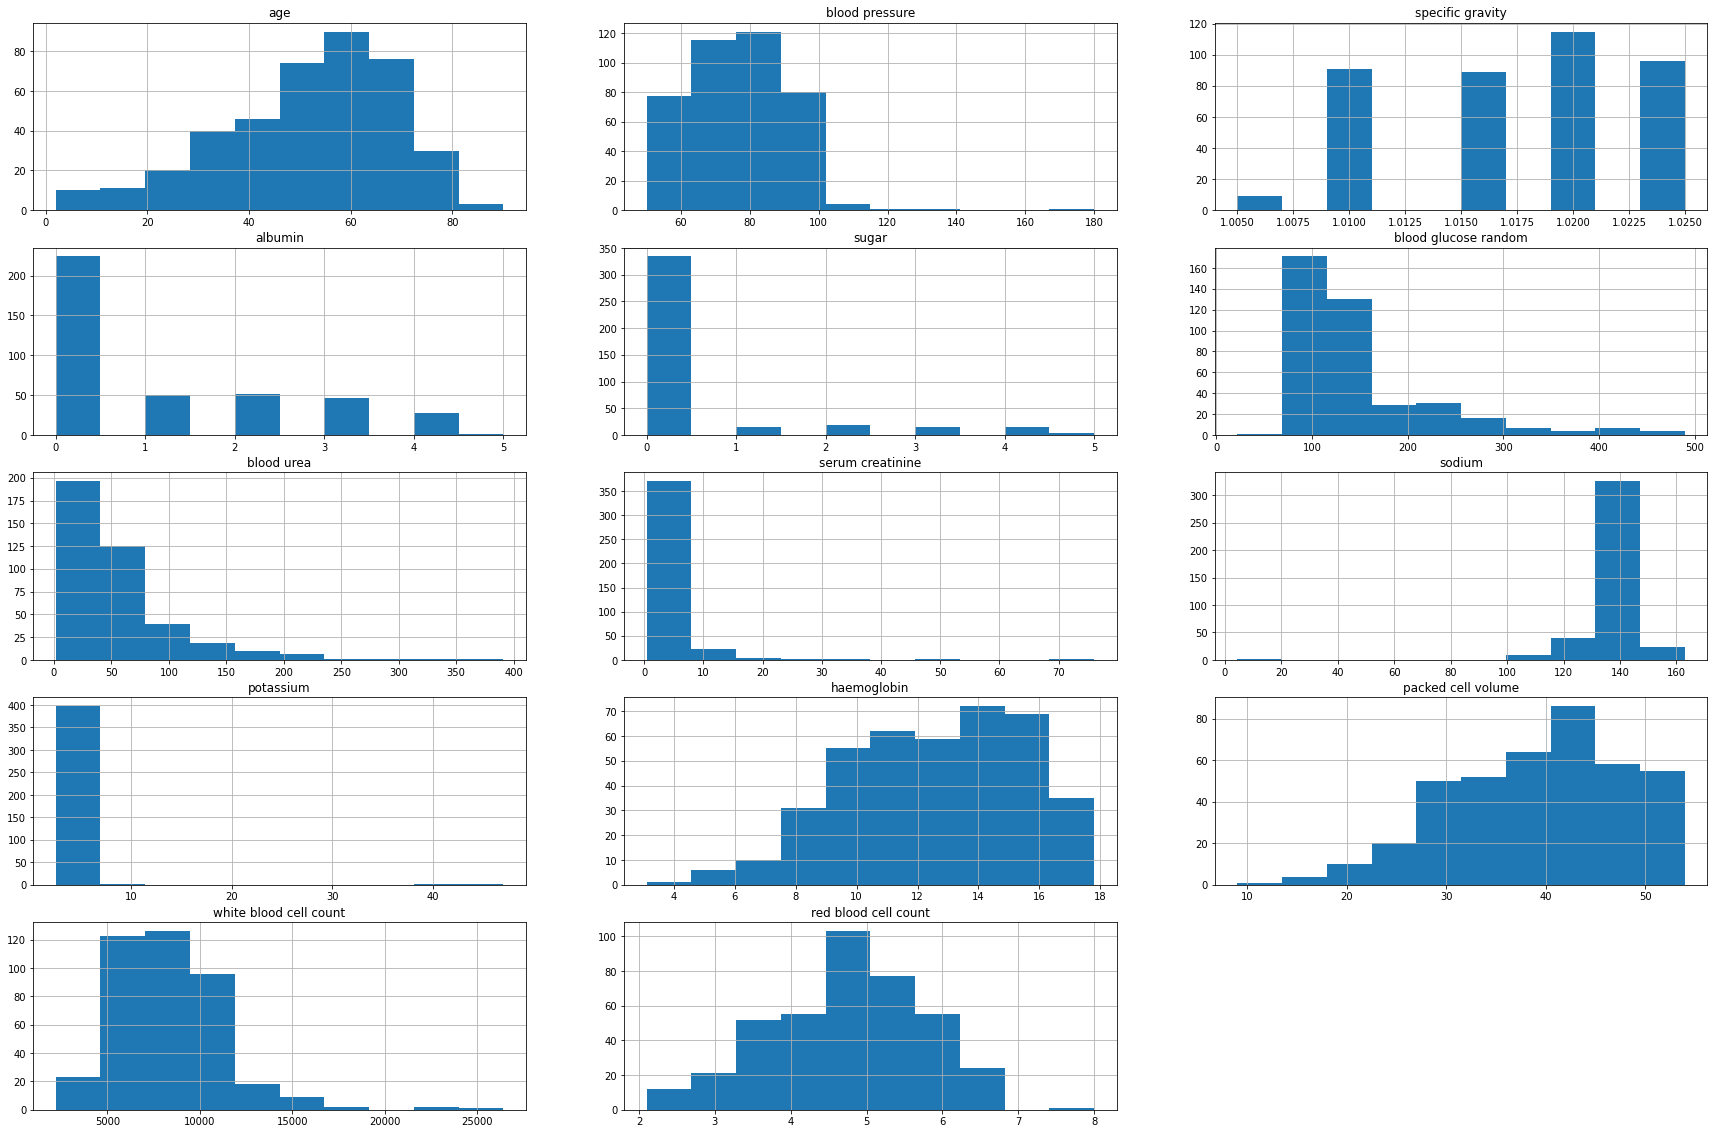

In [22]:
plt.figure(figsize=(30,20))

for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

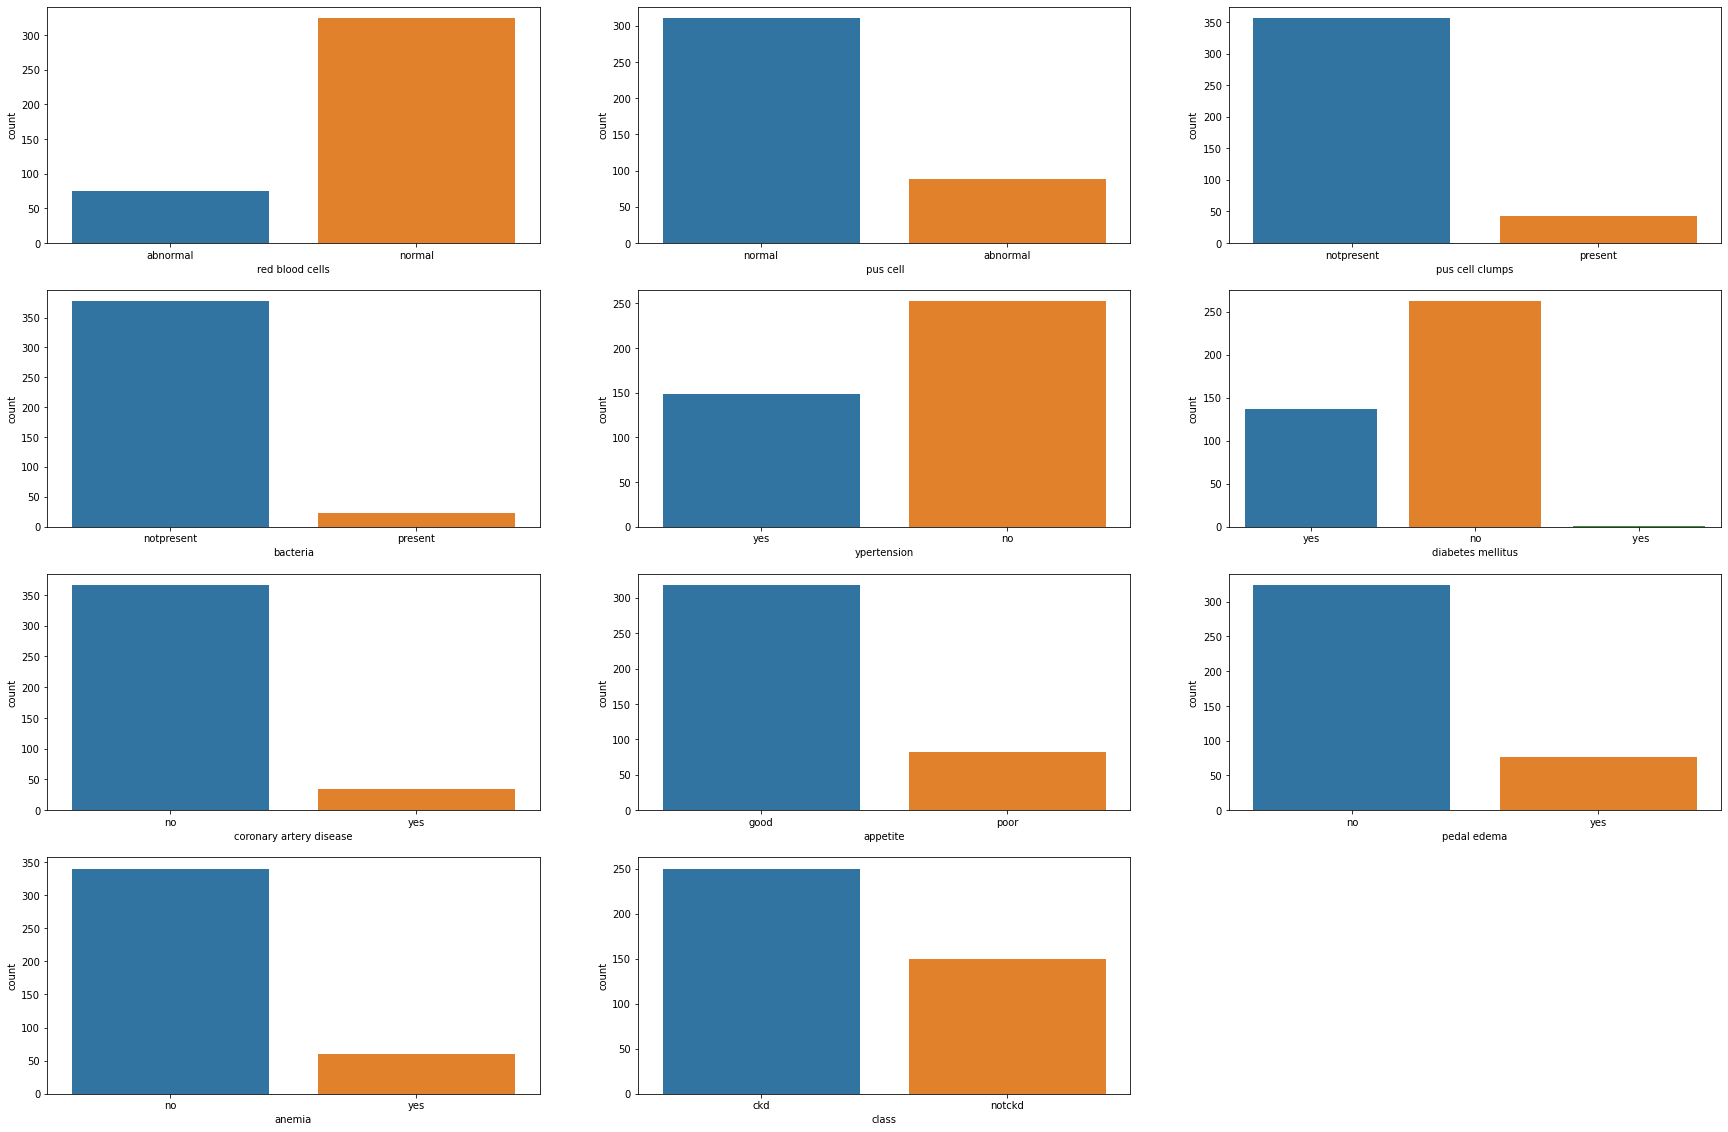

In [23]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

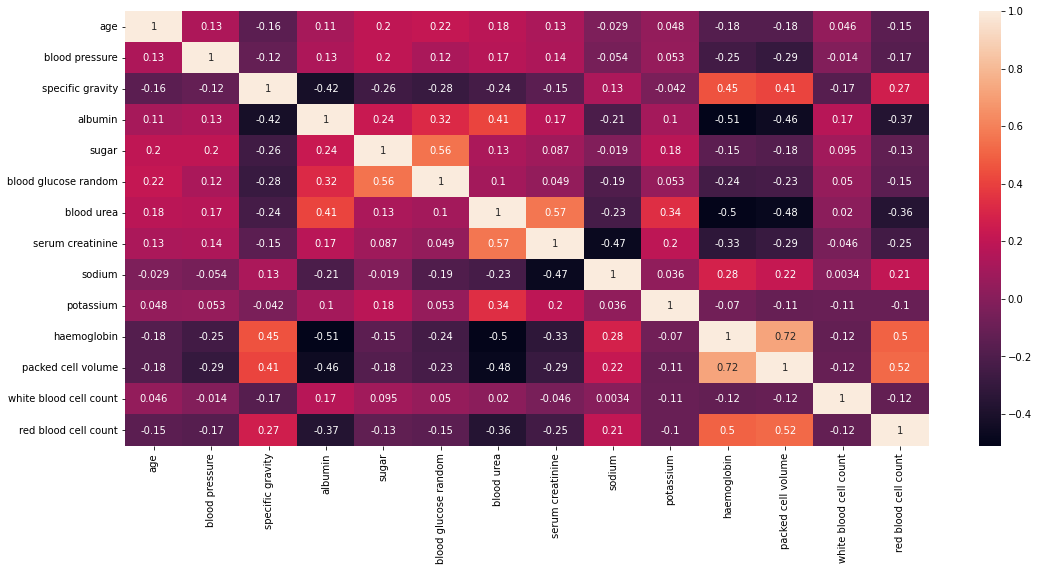

In [24]:
plt.figure(figsize=(18,8)) 
sns.heatmap(df.corr(),annot=True)

In [25]:
!pip install tabulate
from tabulate import tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
g=[['Name','count','mean','median','min','max']]
for i in df.columns:
    if df[i].dtypes=='float64':
        d=[i, df[i].count(), df[i].mean(), df[i].median(), df[i].min(), df[i].max()]
        g.append(d)      
print(tabulate(g, headers='firstrow'))

Name                      count        mean    median       min        max
----------------------  -------  ----------  --------  --------  ---------
age                         400    51.555       54        2         90
blood pressure              400    76.575       80       50        180
specific gravity            400     1.01748      1.02     1.005      1.025
albumin                     400     1.015        0        0          5
sugar                       400     0.4275       0        0          5
blood glucose random        400   147.315      122       22        490
blood urea                  400    57.2105      41.5      1.5      391
serum creatinine            400     3.05462      1.3      0.4       76
sodium                      400   137.387      138        4.5      163
potassium                   400     4.56925      4.4      2.5       47
haemoglobin                 400    12.527       12.6      3.1       17.8
packed cell volume          400    38.9975      40        9    

# DEPENDENT AND INDEPENDENT VARIABLES

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    df[col]=le.fit_transform(df[col])
df.head()
#0 is ckd and 1 is non ckd

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,130.0,...,38.0,6000.0,3.6,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.4,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [29]:
ind_col=[col for col in df.columns if col!='class']
dep_col='class'

In [30]:
x=df[ind_col]
y=df[dep_col]

In [31]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_feature.fit(x,y)
ordered_feature.scores_

array([1.17079895e+02, 8.17867015e+01, 4.90116874e-03, 2.37242036e+02,
       9.32245614e+01, 1.03846154e+01, 1.43796356e+01, 2.26992248e+01,
       1.07855072e+01, 2.32227272e+03, 2.41576917e+03, 3.60475188e+02,
       3.15902211e+01, 2.77656107e+00, 1.30077409e+02, 3.09871252e+02,
       1.02927937e+04, 1.87894045e+01, 8.56288288e+01, 1.99004975e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [32]:
df_score=pd.DataFrame(ordered_feature.scores_,columns=['score'])

In [33]:
df_x=pd.DataFrame(x.columns,columns=['feature'])
features_rank=pd.concat([df_x,df_score],axis=1)
features_rank.head()

,feature,score
0,age,117.079895
1,blood pressure,81.786701
2,specific gravity,0.004901
3,albumin,237.242036
4,sugar,93.224561


In [34]:
features_rank['score'].max()

10292.793718090348

In [35]:
features_rank.nlargest(10,'score')

,feature,score
16,white blood cell count,10292.793718
10,blood urea,2415.769167
9,blood glucose random,2322.272722
11,serum creatinine,360.475188
15,packed cell volume,309.871252
3,albumin,237.242036
14,haemoglobin,130.077409
0,age,117.079895
4,sugar,93.224561
18,ypertension,85.628829


In [36]:
selected_columns=features_rank.nlargest(10,'score')['feature'].values
selected_columns

array(['white blood cell count', 'blood urea', 'blood glucose random',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [37]:
x_new=df[selected_columns]
x_new.head()

,white blood cell count,blood urea,blood glucose random,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,130.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [38]:
len(x_new)

400

In [39]:
x_new.shape

(400, 10)

# PREDICTION MODEL

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
confusion_matrix(y_test, model.predict(x_test))

array([[52,  0],
       [ 2, 26]])

In [46]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(x_test))*100, 2)}%")

Accuracy is 97.5%


# Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [48]:
import pickle
pickle. dump(x_new, open('randomclass_chronic', 'wb'))

In [49]:
y_pred=reg.predict(x_test)

In [50]:
pickle. dump(reg, open('randomreg_chronic', 'wb'))

In [51]:
y_pred

array([0.03, 0.16, 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.86, 0.  , 0.  ,
       1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  ,
       1.  , 1.  , 0.23, 1.  , 0.02, 0.  , 1.  , 0.02, 1.  , 0.  , 1.  ,
       0.03, 0.06, 0.08, 0.11, 1.  , 0.  , 0.  , 1.  , 0.12, 0.  , 0.  ,
       0.04, 1.  , 0.02, 0.  , 0.  , 0.09, 0.  , 1.  , 1.  , 0.15, 1.  ,
       0.04, 0.08, 0.  , 0.34, 0.02, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
       1.  , 0.44, 1.  , 0.  , 1.  , 0.3 , 0.  , 0.  , 1.  , 0.  , 0.  ,
       1.  , 0.05, 1.  ])

In [52]:
l_pred=list(y_pred)

In [53]:
l_test=list(y_test)

In [54]:
d={'prob':l_pred,'out':y_test}

In [55]:
df_i=pd.DataFrame(d)


In [56]:
df_i.head()

,prob,out
209,0.03,0
280,0.16,1
33,0.00,0
210,0.00,0
93,0.00,0


In [57]:
import pickle
loaded_class = pickle. load(open('randomclass_chronic', 'rb'))
loaded_reg = pickle. load(open('randomreg_chronic', 'rb'))

In [58]:
import numpy as np
import pandas as pd

In [60]:
from google.colab import files
uploaded = files.upload()

Saving Prediction.html to Prediction.html


In [ ]:
from flask import Flask, request, redirect, render_template
app = Flask(__name__)
@app.route("/",methods=['GET', 'POST'])
def index():
    return render_template('Prediction.html')
@app.route("/val",methods=['POST'])

def val():
    test=[]
    if request.method == 'POST':
        test.append(request.form.get("age"))
        test.append(request.form.get("White blood cell count"))
        test.append(request.form.get("Blood Urea"))
        test.append(request.form.get("Blood glucose random"))
        test.append(request.form.get("Serum creatine"))
        test.append(request.form.get("Packed cell Volume"))
        test.append(request.form.get("Albumin"))
        test.append(request.form.get("Haemoglobin"))
        test.append(request.form.get("Sugar Level"))
        test.append(request.form.get("Hypertension"))
        ht=request.form.get("Hypertension")
        if ht=='1':
            test.append(1)
        else:
            test.append(0)
      
       
        an=request.form.get("Albumin")
        if albumin>'4.0':
            test.append(1)
        else:
            test.append(0)
    print(test)
    test_df=pd.DataFrame(test)
    test_df=np.array(test_df).reshape(1, -1)
    ans1=loaded_class.predict(test_df)
    ans2=loaded_reg.predict(test_df)
    if int(ans1)==1:
        answer1="Sorry to say!! You have CHRONIC DISEASE!!!"
        return render_template('Prediction.html',res=answer1)
    else:
        answer1="Happy to say that you don't have CHRONIC DISEASE"

        return render_template('Prediction.html',res=answer1)
    
if __name__ == "__main__":
    app.debug=True
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
